## 데이터 분석

In [19]:
# 데이터 불러오기
import pandas as pd
import numpy as np

tl_session2 = pd.read_csv('./data/train/tl_session2.csv')
tl_session2.head()

,id,topic,gender,age,occupation,num_session,init_persona,final_persona,session_1_dialog,session_1_persona,session_2_dialog,session_2_persona
0,K5-03991-CL74320-CP03664-02-08-S2.json,주거와 생활,남성,30대,기능직,2,"['나는 남자이다.', '나는 40대이다.', '나의 가족은 3명이다.', '나는 ...","['나는 남자이다. 나는 40대이다.', '나는 추운 날씨를 좋아한다. 나는 겨울을...","['안녕하세요? 저는 40대 남자입니다.', '그렇군요. 지금 뭐하고 계세요? 오늘...","['나는 남자이다. 나는 40대이다.', '나는 추운 날씨를 좋아한다. 나는 겨울을...","['안녕하세요? 제가 어제 다시 연락 드린다는게 늦었네요.', '죄송해요. 제가 연...","['나는 연락하는 것을 까먹었다.', '나는 곧 이사를 가야한다.', '현재 내가 ..."
1,K5-03991-CL74320-CP03664-02-08-S2.json,주거와 생활,남성,30대,사무직,2,"['나는 남자이다.', '나는 40대이다.', '나의 종교는 불교이다.', '나는 ...","['나는 남자이다. 나는 40대이다. 나의 종교는 불교이다.', '나는 짠 음식을 ...","['안녕하세요? 저는 40대 남자입니다. 제 종교는 불교에요.', '저랑 비슷하시네...","['나는 남자이다. 나는 40대이다. 나의 종교는 불교이다.', '나는 짠 음식을 ...","['어제 다시 연락주실 줄 알았는데 연락이 안오더라고요.', '아니에요. 그럴 수 ...",[]
2,K5-03984-CL74442-CP22286-13-04-S2.json,기후>계절/날씨,여성,20대,무직,2,"['나는 여자이다.', '나는 20대이다.', '나는 아메리카노를 자주 마신다.',...","['나는 20대 여자이다. 나는 아메리카노를 자주 마신다.', '나는 뉴질랜드로 어...","['반가워요~~ 저는 20대 여자입니다. 저는 아메리카노를 자주 마셔요.', '오 ...","['나는 20대 여자이다. 나는 아메리카노를 자주 마신다.', '나는 뉴질랜드로 어...","['안녕하세요. 며칠간 일은 잘 하고 계셨죠?', '좋네요. 저는 일렉기타 연주 가...","['나는 일렉기타 연주를 가끔 한다.', '나는 요즘 단풍에 대해서 관심을 갖고 공..."
3,K5-03984-CL74442-CP22286-13-04-S2.json,기후>계절/날씨,여성,20대,학생,2,"['나는 여자이다.', '나는 20대이다.', '나는 매우 조용하다.', '나는 도...",['나는 20대 여자이다. 나는 도서관 사서이다.'],"['아 반갑습니다. 저는 20대 여자이고요. 도서관 사서로 일하고 있어요.', '아...",['나는 20대 여자이다. 나는 도서관 사서이다.'],"['아 네 안녕하세요. 잘 지냈습니다.', '아 일렉 기타 하시는 구나 저도 악기를...","['나는 트럼펫 연주를 배운다.', '나는 상대 덕분에 새로운 사실을 알았다.']"
4,K5-03995-CL74539-CP32098-15-04-S2.json,시사/사회>타국가이슈(해외),남성,30대,사무직,2,"['나는 남자이다.', '나는 30대이다.', '나는 건축학과를 전공했다.', '나...","['나는 30대 남자이다.', '나는 건축학과를 전공해서 건설회사에 근무 중이다.'...","['안녕하세요. 반갑습니다. 저는 30대 남자예요.', '저는 건축학과를 전공해서 ...","['나는 30대 남자이다.', '나는 건축학과를 전공해서 건설회사에 근무 중이다.'...",['안녕하세요. 6일 만에 연락드리네요. 저는 이번에 벼르다 벼르다 코로나백신 4차...,"['나는 요즘 백신에 대해서 관심을 갖고 공부한다.', '우리나라도 실외에서 마스크..."


In [18]:
# null값 확인
tl_session2.isnull().sum()

id                    0
topic                 0
gender                0
age                   0
occupation           26
num_session           0
init_persona          0
final_persona         0
session_1_dialog      0
session_1_persona     0
session_2_dialog      0
session_2_persona     0
dtype: int64

In [6]:
# 나이대별 분포
tl_session2.groupby('age')['id'].count()

age
10대         820
20대       21722
30대       33226
40대        8494
50대        6511
60대 이상     1225
60대이상         2
Name: id, dtype: int64

In [4]:
# 남성, 여성의 비율
tl_session2['gender'].value_counts()

gender
여성    43907
남성    28093
Name: count, dtype: int64

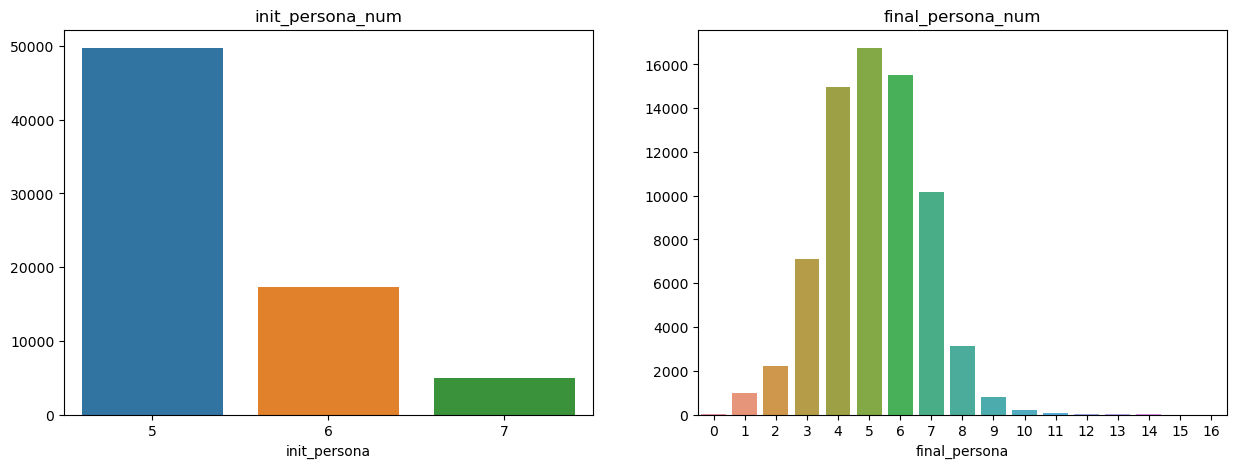

In [213]:
# init_persona와 final_persona의 문장 길이 통계 시각화
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x=tl_session2['init_persona'].apply(lambda x: len(eval(x))).value_counts().index,
             y=tl_session2['init_persona'].apply(lambda x: len(eval(x))).value_counts().values,
             ax=ax[0])
ax[0].set_title('init_persona_num')
sns.barplot(x=tl_session2['final_persona'].apply(lambda x: len(eval(x))).value_counts().index,
             y=tl_session2['final_persona'].apply(lambda x: len(eval(x))).value_counts().values,
             ax=ax[1])
ax[1].set_title('final_persona_num')
plt.show()

Text(0.5, 1.0, 'session_2_persona_num')

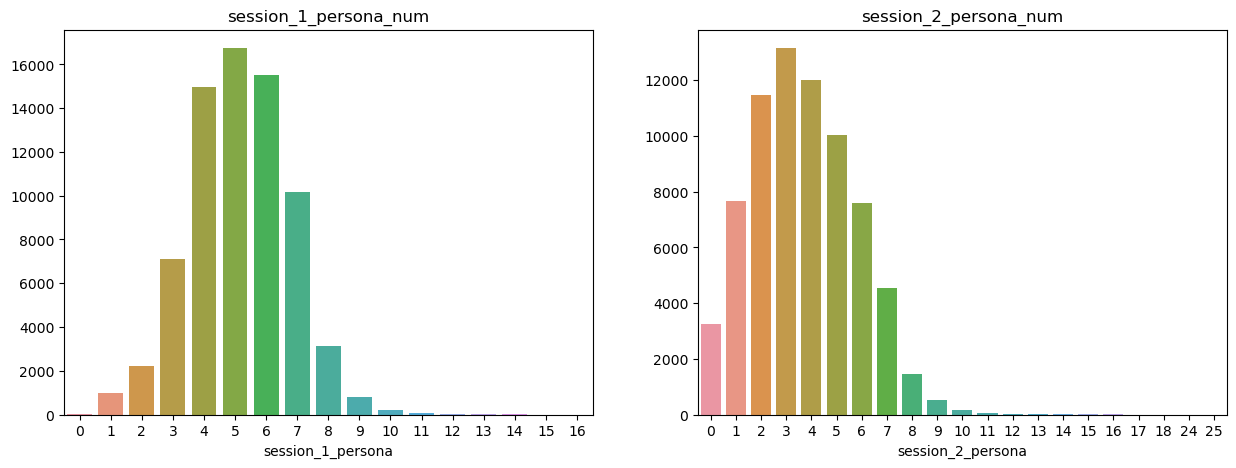

In [287]:
## session별 persona의 개수

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x=tl_session2['session_1_persona'].apply(lambda x: len(eval(x))).value_counts().index,
            y=tl_session2['session_1_persona'].apply(lambda x: len(eval(x))).value_counts().values,
            ax=ax[0])
ax[0].set_title('session_1_persona_num')

sns.barplot(x=tl_session2['session_2_persona'].apply(lambda x: len(eval(x))).value_counts().index,
            y=tl_session2['session_2_persona'].apply(lambda x: len(eval(x))).value_counts().values,
            ax=ax[1])
ax[1].set_title('session_2_persona_num')

Text(0.5, 1.0, 'session_2_dialog_num')

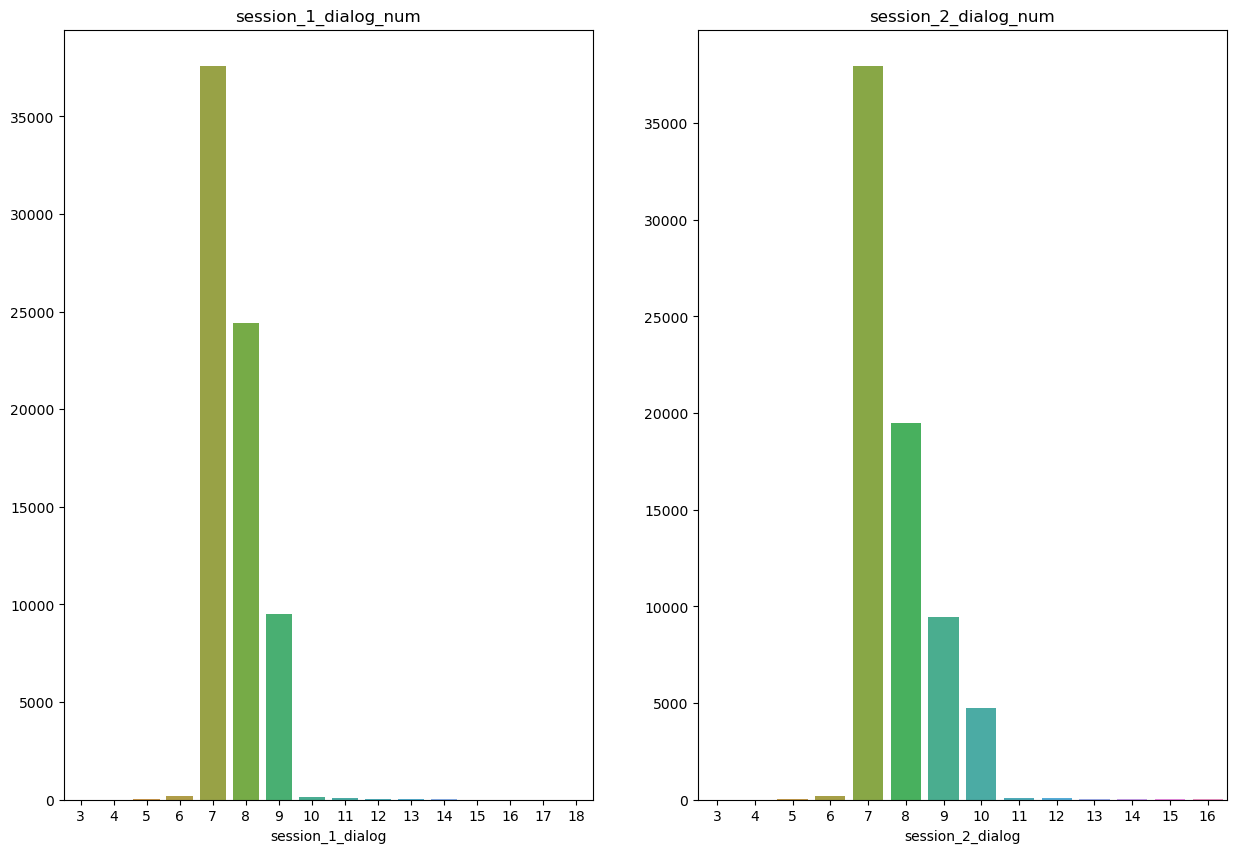

In [212]:
## session별 dialog의 개수

fig, ax = plt.subplots(1, 2, figsize=(15, 10))

sns.barplot(x=tl_session2['session_1_dialog'].apply(lambda x: len(eval(x))).value_counts().index, 
            y=tl_session2['session_1_dialog'].apply(lambda x: len(eval(x))).value_counts().values, 
            ax=ax[0])
ax[0].set_title('session_1_dialog_num')

sns.barplot(x=tl_session2['session_2_dialog'].apply(lambda x: len(eval(x))).value_counts().index, 
            y=tl_session2['session_2_dialog'].apply(lambda x: len(eval(x))).value_counts().values, 
            ax=ax[1])
ax[1].set_title('session_2_dialog_num')


## 문장 요약 테스트

- 'digit82/kobart-summarization'

In [24]:
import torch

In [11]:
from transformers import PreTrainedTokenizerFast
from transformers import BartForConditionalGeneration

bart_tokenizer = PreTrainedTokenizerFast.from_pretrained('digit82/kobart-summarization')
bart_summarization_model = BartForConditionalGeneration.from_pretrained('digit82/kobart-summarization', cache_dir='./cache')

/home/donghae/anaconda3/envs/persona_extraction/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
tokenizer_config.json: 100%|██████████| 295/295 [00:00<00:00, 1.11MB/s]
tokenizer.json: 100%|██████████| 682k/682k [00:00<00:00, 916kB/s]
special_tokens_map.json: 100%|██████████| 109/109 [00:00<00:00, 531kB/s]
config.json: 100%|██████████| 1.20k/1.20k [00:00<00:00, 4.91MB/s]
You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.
pytorch_model.bin: 100%|██████████| 496M/496M [00:08<00:00, 56.9MB/s] 


In [13]:
tl_session2['init_persona'][0]

"['나는 남자이다.', '나는 40대이다.', '나의 가족은 3명이다.', '나는 추운 날씨를 좋아한다.', '나는 클래식 음악을 가끔 듣는다.', '나는 요즘 역세권에 대해서 관심을 갖고 공부한다.']"

In [14]:
tl_session2['final_persona'][0]

"['나는 남자이다. 나는 40대이다.', '나는 추운 날씨를 좋아한다. 나는 겨울을 좋아한다.', '나는 클래식 음악을 가끔 듣는다.', '나의 가족은 3명이다.', '나는 급한 일이 있다.']"

In [192]:
# text = eval(tl_session2['final_persona'][0]) # + eval(tl_session2['final_persona'][0])

def get_persona(text, beams=3):
    raw_input_ids = bart_tokenizer.encode(' '.join(text))
    input_ids = [bart_tokenizer.bos_token_id] + raw_input_ids + [bart_tokenizer.eos_token_id]
    
    bart_summarization_model.eval()
    with torch.no_grad():
        summary_ids = [bart_summarization_model.generate(torch.tensor([input_ids]),  num_beams=num_beam,  max_length=512,  eos_token_id=1) for num_beam in range(1, beams+1)]
    
    outputs = [f'beam_size: {i} :' + bart_tokenizer.decode(summary_id.squeeze().tolist(), skip_special_tokens=True) for i, summary_id in enumerate(summary_ids, start=1)]

    return outputs

In [193]:
## final_persona만 사용 

text = eval(tl_session2['final_persona'][0])# + eval(tl_session2['init_persona'][0])
print(text)
get_persona(text)

['나는 남자이다. 나는 40대이다.', '나는 추운 날씨를 좋아한다. 나는 겨울을 좋아한다.', '나는 클래식 음악을 가끔 듣는다.', '나의 가족은 3명이다.', '나는 급한 일이 있다.']


['beam_size: 1 :나는 40대 남자이고 40대이다.',
 'beam_size: 2 :나는 40대한 일이 있고 급한 일이 있으며 나는 40대이다.',
 'beam_size: 3 :나는 40대한 일이 있고 급한 일이 있고 급한 일이 있으며 나는 남자이다. 나는 40대이다. 나는 40대이다. 나는 40대이다. 나는 40대이다. 나는 추운 날씨를 좋아하고 추운 날씨를 좋아하며 겨울을 좋아한다.']

In [214]:
## init_persona만 사용

text = eval(tl_session2['init_persona'][0])# + eval(tl_session2['init_persona'][0])
print(text)
get_persona(text)

['나는 남자이다.', '나는 40대이다.', '나의 가족은 3명이다.', '나는 추운 날씨를 좋아한다.', '나는 클래식 음악을 가끔 듣는다.', '나는 요즘 역세권에 대해서 관심을 갖고 공부한다.']


['beam_size: 1 :나는 40대 40대이고 가족은 3명이며 추운 날씨를 좋아한다.',
 'beam_size: 2 :추운 날씨를 좋아하고 클래식 음악을 가끔 듣는다는 나는 요즘 역세권에 대해서 관심을 갖고 공부한다.',
 'beam_size: 3 :추운 날씨를 좋아하고 클래식 음악을 가끔 듣는다는 나는 요즘 역세권에 대해서 관심을 갖고 공부한다.']

In [194]:
## final_persona의 맨 앞의 '나는'을 없에기

text = eval(tl_session2['final_persona'][0])# + eval(tl_session2['init_persona'][0])
text = [t[3:] for t in text]
print(text)
get_persona(text)

['남자이다. 나는 40대이다.', '추운 날씨를 좋아한다. 나는 겨울을 좋아한다.', '클래식 음악을 가끔 듣는다.', '가족은 3명이다.', '급한 일이 있다.']


['beam_size: 1 :나는 40대 40대이고 클래식 음악을 가끔 듣는다.',
 'beam_size: 2 :추운 날씨를 좋아하고 클래식 음악을 가끔 듣는다.',
 'beam_size: 3 :추운 날씨를 좋아하고 클래식 음악을 가끔 듣는다.']

- gpt-3.5 turbo

In [ ]:
## chatGPT
'''
prompt : 다음에 주어지는 파이썬 리스트는 사람의 페르소나와 관련된 정보이다. 
['나는 남자이다.', '나는 40대이다.', '나의 가족은 3명이다.', '나는 추운 날씨를 좋아한다.', '나는 클래식 음악을 가끔 듣는다.', '나는 요즘 역세권에 대해서 관심을 갖고 공부한다.', '나는 남자이다. 나는 40대이다.', '나는 추운 날씨를 좋아한다. 나는 겨울을 좋아한다.', '나는 클래식 음악을 가끔 듣는다.', '나의 가족은 3명이다.', '나는 급한 일이 있다.'] 
이 리스트 속 페르소나를 한 문장으로 요약해서 파이썬 string 형태로 반환
'''

'''
answer : "나는 남자이고 40대이며 가족은 3명이며 추운 날씨와 겨울을 좋아하며 클래식 음악을 가끔 듣고 역세권에 대해서 관심을 갖고 있으며 급한 일이 있다."
'''

## 일상 대화 요약 모델 테스트

- 사용 모델 : [alaggung/bart-r3f](https://huggingface.co/alaggung/bart-r3f)

In [169]:
from transformers import AutoTokenizer, BartForConditionalGeneration

dialog_tokenizer = AutoTokenizer.from_pretrained('alaggung/bart-r3f')
dialog_model = BartForConditionalGeneration.from_pretrained('alaggung/bart-r3f', cache_dir='./cache')

config.json: 100%|██████████| 1.02k/1.02k [00:00<00:00, 3.98MB/s]
pytorch_model.bin: 100%|██████████| 187M/187M [00:02<00:00, 67.1MB/s] 


### 일상 대화 요약모델로 페르소나를 요약

In [283]:
eval(tl_session2['init_persona'][0])

['나는 남자이다.',
 '나는 40대이다.',
 '나의 가족은 3명이다.',
 '나는 추운 날씨를 좋아한다.',
 '나는 클래식 음악을 가끔 듣는다.',
 '나는 요즘 역세권에 대해서 관심을 갖고 공부한다.']

In [269]:
text = eval(tl_session2['init_persona'][0])
text = text[3:]
text

['나는 추운 날씨를 좋아한다.', '나는 클래식 음악을 가끔 듣는다.', '나는 요즘 역세권에 대해서 관심을 갖고 공부한다.']

In [270]:
input_ids = dialog_tokenizer.encode('[BOS]'+'[SEP]'.join(text)+'[EOS]')

In [271]:
output = dialog_model.generate(torch.tensor([input_ids]),  num_beams=3,  max_length=100,  eos_token_id=1)
output

tensor([[   2,  762,  310,  880, 1188,   80,  133, 1094, 1259,  264,  350,  122,
         1043,  851, 1666,  678,  474,  110, 2101,    3,    3,    3,    3,    3,
            3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
            3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
            3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
            3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
            3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
            3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
            3,    3,    3,    3]])

In [272]:
dialog_tokenizer.decode(output.squeeze().tolist(), skip_special_tokens=True) # text[3:]

'추운 날씨를 좋아해서 클래식 음악을 가끔 듣는다.'

In [267]:
dialog_tokenizer.decode(output.squeeze().tolist(), skip_special_tokens=True) # text[:3]

'나는 40대이고 나의 가족은 3명이다.'

In [268]:
after_text = ['추운 날씨를 좋아해서 클래식 음악을 가끔 듣는다.','나는 40대이고 나의 가족은 3명이다.']
input_ids = dialog_tokenizer.encode('[BOS]'+'[SEP]'.join(after_text)+'[EOS]')
dialog_model.eval()
with torch.no_grad():
    output = dialog_model.generate(torch.tensor([input_ids]),  num_beams=3,  max_length=100,  eos_token_id=1)
dialog_tokenizer.decode(output.squeeze().tolist(), skip_special_tokens=True)

'추운 날씨를 좋아해서 클래식 음악을 가끔 듣는다.을 하고 있다.'

- 일상 대화의 경우 하나의 문장 안에 그리 많은 정보가 들어있지 않을 수 있다.
- 3개씩 나눠서 저장하고 사용하는게 좋아보인다

### 일상 대화 요약 모델의 일상 대화 성능

In [274]:
# 데이터 불러오기
import pandas as pd
import numpy as np

tl_session2 = pd.read_csv('./data/train/tl_session2.csv')
tl_session2.head()

,id,topic,gender,age,occupation,num_session,init_persona,final_persona,session_1_dialog,session_1_persona,session_2_dialog,session_2_persona
0,K5-03991-CL74320-CP03664-02-08-S2.json,주거와 생활,남성,30대,기능직,2,"['나는 남자이다.', '나는 40대이다.', '나의 가족은 3명이다.', '나는 ...","['나는 남자이다. 나는 40대이다.', '나는 추운 날씨를 좋아한다. 나는 겨울을...","['안녕하세요? 저는 40대 남자입니다.', '그렇군요. 지금 뭐하고 계세요? 오늘...","['나는 남자이다. 나는 40대이다.', '나는 추운 날씨를 좋아한다. 나는 겨울을...","['안녕하세요? 제가 어제 다시 연락 드린다는게 늦었네요.', '죄송해요. 제가 연...","['나는 연락하는 것을 까먹었다.', '나는 곧 이사를 가야한다.', '현재 내가 ..."
1,K5-03991-CL74320-CP03664-02-08-S2.json,주거와 생활,남성,30대,사무직,2,"['나는 남자이다.', '나는 40대이다.', '나의 종교는 불교이다.', '나는 ...","['나는 남자이다. 나는 40대이다. 나의 종교는 불교이다.', '나는 짠 음식을 ...","['안녕하세요? 저는 40대 남자입니다. 제 종교는 불교에요.', '저랑 비슷하시네...","['나는 남자이다. 나는 40대이다. 나의 종교는 불교이다.', '나는 짠 음식을 ...","['어제 다시 연락주실 줄 알았는데 연락이 안오더라고요.', '아니에요. 그럴 수 ...",[]
2,K5-03984-CL74442-CP22286-13-04-S2.json,기후>계절/날씨,여성,20대,무직,2,"['나는 여자이다.', '나는 20대이다.', '나는 아메리카노를 자주 마신다.',...","['나는 20대 여자이다. 나는 아메리카노를 자주 마신다.', '나는 뉴질랜드로 어...","['반가워요~~ 저는 20대 여자입니다. 저는 아메리카노를 자주 마셔요.', '오 ...","['나는 20대 여자이다. 나는 아메리카노를 자주 마신다.', '나는 뉴질랜드로 어...","['안녕하세요. 며칠간 일은 잘 하고 계셨죠?', '좋네요. 저는 일렉기타 연주 가...","['나는 일렉기타 연주를 가끔 한다.', '나는 요즘 단풍에 대해서 관심을 갖고 공..."
3,K5-03984-CL74442-CP22286-13-04-S2.json,기후>계절/날씨,여성,20대,학생,2,"['나는 여자이다.', '나는 20대이다.', '나는 매우 조용하다.', '나는 도...",['나는 20대 여자이다. 나는 도서관 사서이다.'],"['아 반갑습니다. 저는 20대 여자이고요. 도서관 사서로 일하고 있어요.', '아...",['나는 20대 여자이다. 나는 도서관 사서이다.'],"['아 네 안녕하세요. 잘 지냈습니다.', '아 일렉 기타 하시는 구나 저도 악기를...","['나는 트럼펫 연주를 배운다.', '나는 상대 덕분에 새로운 사실을 알았다.']"
4,K5-03995-CL74539-CP32098-15-04-S2.json,시사/사회>타국가이슈(해외),남성,30대,사무직,2,"['나는 남자이다.', '나는 30대이다.', '나는 건축학과를 전공했다.', '나...","['나는 30대 남자이다.', '나는 건축학과를 전공해서 건설회사에 근무 중이다.'...","['안녕하세요. 반갑습니다. 저는 30대 남자예요.', '저는 건축학과를 전공해서 ...","['나는 30대 남자이다.', '나는 건축학과를 전공해서 건설회사에 근무 중이다.'...",['안녕하세요. 6일 만에 연락드리네요. 저는 이번에 벼르다 벼르다 코로나백신 4차...,"['나는 요즘 백신에 대해서 관심을 갖고 공부한다.', '우리나라도 실외에서 마스크..."


In [275]:
tl_session2['session_1_dialog'][0]

"['안녕하세요? 저는 40대 남자입니다.', '그렇군요. 지금 뭐하고 계세요? 오늘 날씨가 많이 춥네요. 저는 추운 날씨가 좋더라고요.', '저는 클래식 음악을 듣고 있어요. 들으면 마음이 차분해져서 가끔 들어요.', '이따가 저녁에 가족이랑 밥 먹으려고요.', '저희 가족은 어머니, 아버지, 형 그리고 저에요. 저 빼고 3명이에요.', '그렇군요. 나중에 시간되면 저랑 같이 밥 먹어요.', '갑자기 급한 일이 생겨서 가봐야겠네요.', '죄송해요. 제가 다음에 다시 연락드릴게요.']"

In [276]:
tl_session2['session_2_dialog'][0]

"['안녕하세요? 제가 어제 다시 연락 드린다는게 늦었네요.', '죄송해요. 제가 연락드리는 걸 까먹었네요.', '이해해 주셔서 정말 감사합니다.', '제가 곧 이사를 가야해서 역세권인 새로운 집을 찾고 있었어요.', '이번달로 전세계약이 끝나거든요. 전세가격이 인상되서 다른 곳으로 가려고요.', '아직까지 제 마음에 쏙 드는 집은 없는 것 같아요.', '네. 상당한 공인중개사 분도 그러다가 남한테 뺏긴다고 적당히 마음에 들면 계약해야된다고 하셨어요.', '그러셨군요. 아 저는 요즘 역세권에 대해서 관심을 갖고 공부하고 있어요.', '역세권은 일반적으로 전철역에서 5~10분 거리에 있는 지역을 일컫는데요. 이 거리는 반경이 아니구요. 실제 걷는 거리로 10분 이내여야해요~', '저도 역세권으로 잘 찾고 싶네요. 저는 부동산 연락와서 집 보러 갈게요!']"

In [279]:
def get_dialog_summary(text):
    input_ids = dialog_tokenizer.encode('[BOS]'+'[SEP]'.join(text)+'[EOS]')
    dialog_model.eval()
    with torch.no_grad():
        output = dialog_model.generate(torch.tensor([input_ids]),  num_beams=3,  max_length=100,  eos_token_id=1)
    output = dialog_tokenizer.decode(output.squeeze().tolist(), skip_special_tokens=True)

    return output

In [280]:
get_dialog_summary(eval(tl_session2['session_1_dialog'][0]))

'오늘 날씨가 많이 춥고 추운 날씨가 좋아서 클래식 음악을 듣고 있다.'

In [281]:
get_dialog_summary(eval(tl_session2['session_2_dialog'][0]))

'이사를 가야 해서 역세권인 새로운 집을 찾고 있었는데 아직까지 마음에 드는 집은 없는 것 같다.'

- 요약 시, 손실되는 정보가 너무 많다
- 라벨 페르소나에 담긴 정보를 예측할 수 있도록 요약된 대화 내에 관련 내용이 있어야 하지만, 손실되는 경우가 많아 학습이 제대로 이뤄지지 않을 듯
- 그렇다면 모든 문장을 다 집어넣고 session마다 페르소나를 뽑아내도록 해야할 듯